In [1]:
'''importing required libraries'''

from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
try:
    import cPickle as pickle
except ImportError: 
    import pickle

In [2]:
'''resizing images from a folder
   taking path of folder and size i.e.,(size, size, 3)
   returns resized images in that folder
   using best quality output i.e.,ANTIALIAS from resizing as there are less images
   we also saved resized image to see whether there too much dataloss
   remove the comment in below code to save the resized pictures'''

def resizing_images(path, size = 96):
    
    width = size
    height = size
    file_names = os.listdir(path)
    count = 0
    
    if ('desktop.ini' in file_names):
        data.remove('desktop.ini')

    data = []
    for file_name in file_names:
        
        img_original = Image.open(path + file_name)
        img_new = img_original.resize((width, height), Image.ANTIALIAS)
        
        #img_original.save("Resized-Dataset/" + path + filename)
        
        img_new = np.array(img_new)
        data.append(img_new)
        
        count+=1
        if(count%50 == 0):
            print(count , " resizings completed")
            
    return data

In [3]:
'''fixing size and path'''

path = "Notes-Dataset/Non-Notes Images/"
size = 96

In [4]:
'''extraction of non-notes images'''

data1 = np.array(resizing_images(path, size))

50  resizings completed
100  resizings completed
150  resizings completed
200  resizings completed
250  resizings completed
300  resizings completed


In [5]:
'''Non-Notes Images as zeros'''

y1 = np.zeros(data1.shape[0])

In [6]:
'''setting path for notes images'''

path = "Notes-Dataset/Notes Images/"

In [7]:
'''extraction of notes images'''

data2 = np.array(resizing_images(path, size))

50  resizings completed
100  resizings completed
150  resizings completed
200  resizings completed
250  resizings completed
300  resizings completed
350  resizings completed
400  resizings completed
450  resizings completed
500  resizings completed
550  resizings completed
600  resizings completed
650  resizings completed
700  resizings completed
750  resizings completed
800  resizings completed
850  resizings completed
900  resizings completed


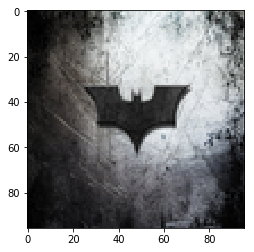

In [8]:
'''demo pic'''

plt.imshow(data1[0])

In [9]:
'''notes images as ones'''

y2 = np.ones(data2.shape[0])

In [10]:
'''concatenating notes and non-notes data and labels'''

data = np.concatenate((data1, data2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)

In [11]:
'''shuffling inputs and labels and also normalizing inputs'''

indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
data = data/255.
y = y[indices]

In [12]:
'''splitting into test and training data'''

data_train, data_test, labels_train, labels_test = train_test_split(data, y, test_size=0.20)

In [13]:
data_train.shape

(1020, 96, 96, 3)

In [14]:
labels_test.shape

(255,)

In [15]:
'''reshaping labels to proper vectors'''

labels_test = labels_test.reshape(data_test.shape[0], 1)
labels_train = labels_train.reshape(data_train.shape[0], 1)

In [16]:
'''creating features dictionary for saving features'''

features = {}

In [17]:
features["data_train"] = data_train 
features["data_test"] = data_test
features["labels_train"] = labels_train 
features["labels_test"] =  labels_test

In [18]:
'''saving extracted features'''

with open('features.p', 'wb') as fp:
    pickle.dump(features, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
'''opening saved features'''

with open('features.p', 'rb') as fp:
    featu = pickle.load(fp)

In [20]:
(featu["data_test"]).shape

(255, 96, 96, 3)